In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
import matplotlib
warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)


In [3]:
# data laoding
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)


df = pd.read_parquet(r"D:\Data_analysis_BI\Project\airline-delay-analysis\data\processed\airlines_data_preproc.parquet")
df.head()



,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015.0,1.0,1.0,4.0,AS,98.0,N407AS,ANC,SEA,5.0,...,408.0,-22.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0
1,2015.0,1.0,1.0,4.0,AA,2336.0,N3KUAA,LAX,PBI,10.0,...,741.0,-9.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0
2,2015.0,1.0,1.0,4.0,US,840.0,N171US,SFO,CLT,20.0,...,811.0,5.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0
3,2015.0,1.0,1.0,4.0,AA,258.0,N3HYAA,LAX,MIA,20.0,...,756.0,-9.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0
4,2015.0,1.0,1.0,4.0,AS,135.0,N527AS,SEA,ANC,25.0,...,259.0,-21.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0


In [4]:
# Basic Summary Statistics
print("Dataset shape:", df.shape)
print("\nNumeric summary:")
print(df.describe())

print("\nCategorical columns:")
print(df[['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT']].nunique())



Dataset shape: (5714008, 31)

Numeric summary:
               YEAR         MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  5.714008e+06  5.714008e+06  5.714008e+06  5.714008e+06   5.714008e+06   
mean   2.015000e+03  6.547799e+00  1.570759e+01  3.932643e+00   2.164384e+03   
std    0.000000e+00  3.397421e+00  8.774394e+00  1.985967e+00   1.754706e+03   
min    2.015000e+03  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%    2.015000e+03  4.000000e+00  8.000000e+00  2.000000e+00   7.280000e+02   
50%    2.015000e+03  7.000000e+00  1.600000e+01  4.000000e+00   1.681000e+03   
75%    2.015000e+03  9.000000e+00  2.300000e+01  6.000000e+00   3.211000e+03   
max    2.015000e+03  1.200000e+01  3.100000e+01  7.000000e+00   9.320000e+03   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT  \
count         5.714008e+06    5.714008e+06     5.714008e+06  5.714008e+06   
mean          1.328907e+03    1.335066e+03     9.294842e+00  1.606550e+01   
s

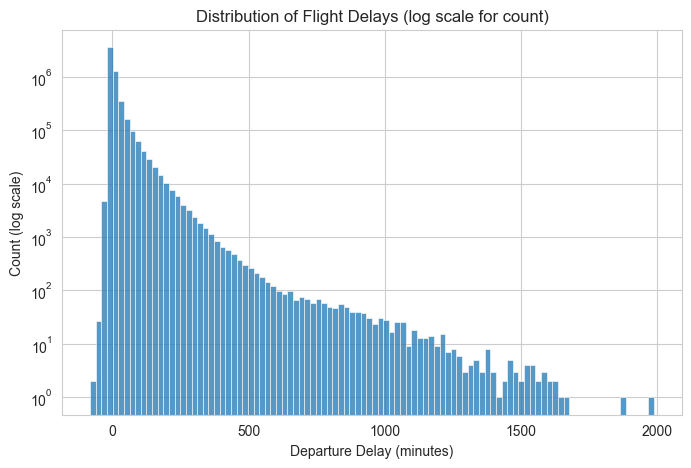

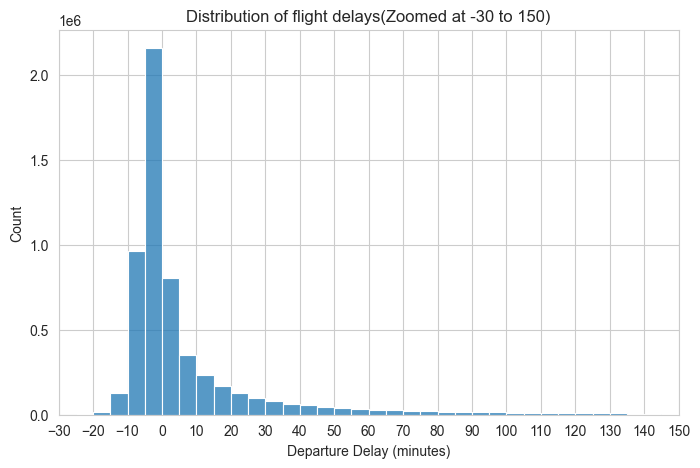

In [5]:
#log scale histogram for detailed distribution of flight delays

plt.figure(figsize=(8,5))
sns.histplot(df['DEPARTURE_DELAY'], bins=100, kde=False)
plt.yscale("log")  # Logarithmic y-axis
plt.title("Distribution of Flight Delays (log scale for count)")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Count (log scale)")
plt.show()

bins = np.arange(-50, 201, 5)  

plt.figure(figsize=(8,5))
sns.histplot(df['DEPARTURE_DELAY'], bins=bins, kde=False)  
plt.xlim(-30, 150)
plt.title("Distribution of flight delays(Zoomed at -30 to 150)")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Count")
plt.xticks(np.arange(-30, 151, 10))
plt.show()

### Most flights depart on time or slightly early, shown by the sharp peak around 0 minutes. The frequency of delays declines steadily as delay time increases, with only a small fraction exceeding 1000 minutes, only a few hundred flights exceed 500 minutes, and only 1–2 flights experience extreme delays near 1700–2000 minutes, illustrating the heavy tail of the departure delay distribution.

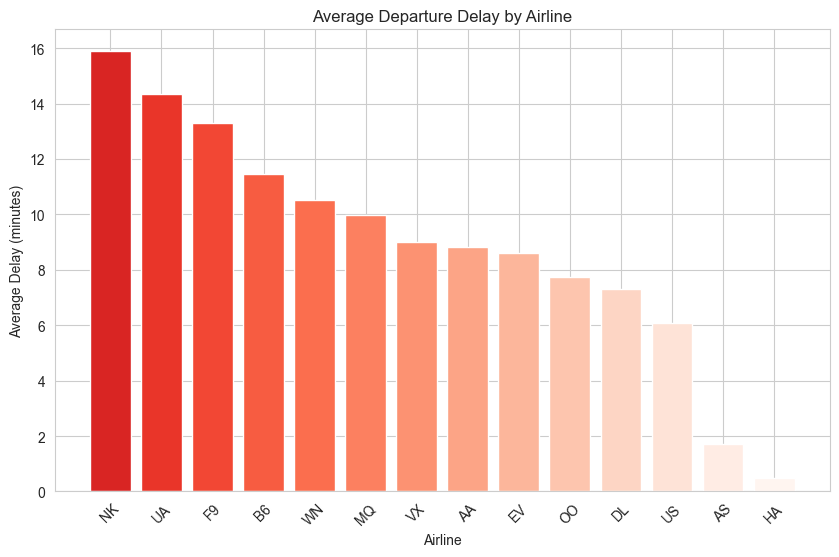

In [6]:
#  Average delay by airline companies
avg_delay_airline = df.groupby('AIRLINE')['DEPARTURE_DELAY'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(avg_delay_airline.index, avg_delay_airline.values, color=plt.cm.Reds_r(np.linspace(0.3,1,len(avg_delay_airline))))
plt.title("Average Departure Delay by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=45)
plt.show()



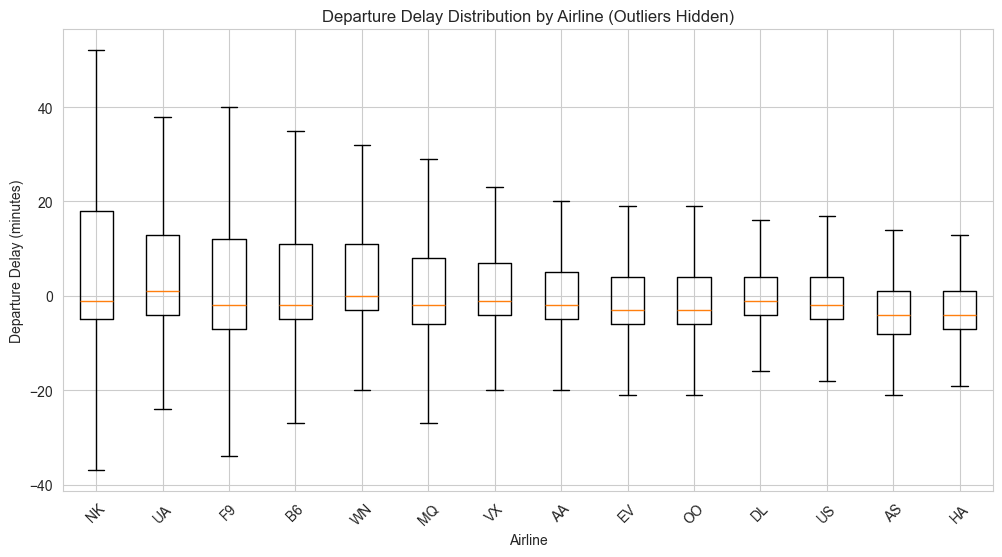

In [7]:
# Box plot
plt.figure(figsize=(12,6))
plt.boxplot([df[df['AIRLINE']==air]['DEPARTURE_DELAY'] for air in avg_delay_airline.index],
            labels=avg_delay_airline.index,
            showfliers=False)#extreme outliers are ignored
plt.title("Departure Delay Distribution by Airline (Outliers Hidden)")
plt.xlabel("Airline")
plt.ylabel("Departure Delay (minutes)")
plt.xticks(rotation=45)
plt.show()



### Based on above 2 plots we can clearly see that top contendors for highest average flight delays are airlines NK, UA and F9 compared to the lowest flight delay airline companies like US AS HA. 

### Although the median (50th percentile) departure delay for all airlines is just below 0 minutes, indicating that most flights depart on time, the top five airlines with the highest delays show that the majority of their upper quartiles (Q3 and Q4) are above 0, meaning a significant portion of their flights are delayed. In contrast, airlines with lower delays have most of their quartiles close to or below 0 minutes.

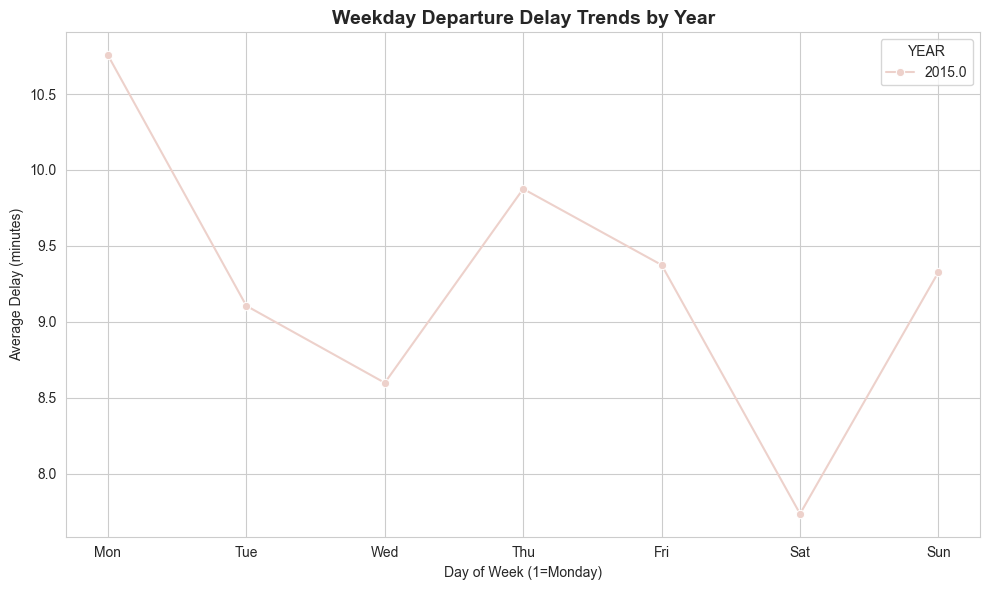

In [8]:
# Plot aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Compute average delay per weekday per year
weekday_yearly = (
    df.groupby(['YEAR', 'DAY_OF_WEEK'])['DEPARTURE_DELAY']
    .mean()
    .reset_index()
)

# Line plot
sns.lineplot(
    data=weekday_yearly,
    x='DAY_OF_WEEK', y='DEPARTURE_DELAY',
    hue='YEAR', marker='o'
)

plt.title("Weekday Departure Delay Trends by Year", fontsize=14, fontweight='bold')
plt.xlabel("Day of Week (1=Monday)")
plt.ylabel("Average Delay (minutes)")
plt.xticks(range(1, 8), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.tight_layout()
plt.show()


### The plot shows that average departure delays are highest on Mondays and Thursdays, with Sunday also experiencing a notable peak. This suggests that early-week business travel and end-of-week weekend traffic may contribute to longer delays.

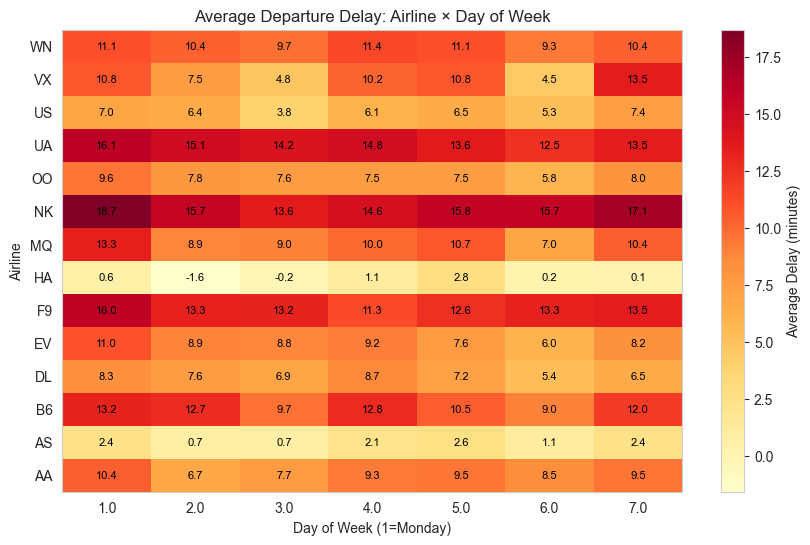

In [9]:
pivot = df.pivot_table(values='DEPARTURE_DELAY', index='AIRLINE', columns='DAY_OF_WEEK', aggfunc='mean')
values = pivot.values

fig, ax = plt.subplots(figsize=(10,6))

# Create edge-aligned heatmap with pcolormesh (avoids imshow/colorbar warning)
X, Y = np.meshgrid(np.arange(values.shape[1]+1), np.arange(values.shape[0]+1))
c = ax.pcolormesh(X, Y, values, cmap='YlOrRd', shading='auto')

# Add colorbar
cbar = fig.colorbar(c, ax=ax)
cbar.set_label('Average Delay (minutes)')

# Ticks at cell centers
ax.set_xticks(np.arange(values.shape[1]) + 0.5)
ax.set_xticklabels(pivot.columns)
ax.set_yticks(np.arange(values.shape[0]) + 0.5)
ax.set_yticklabels(pivot.index)

# Annotate
for i in range(values.shape[0]):
    for j in range(values.shape[1]):
        if not np.isnan(values[i,j]):
            ax.text(j + 0.5, i + 0.5, f"{values[i,j]:.1f}", ha='center', va='center', color='black', fontsize=8)

ax.set_xlabel("Day of Week (1=Monday)")
ax.set_ylabel("Airline")
ax.set_title("Average Departure Delay: Airline × Day of Week")

plt.show()


### This heatmap confirms the previous plots: it shows which airlines have highest and lowest delays and how delays peak on Monday, Thursday, and Sunday, highlighting the interaction between airline and weekday as discussed above.

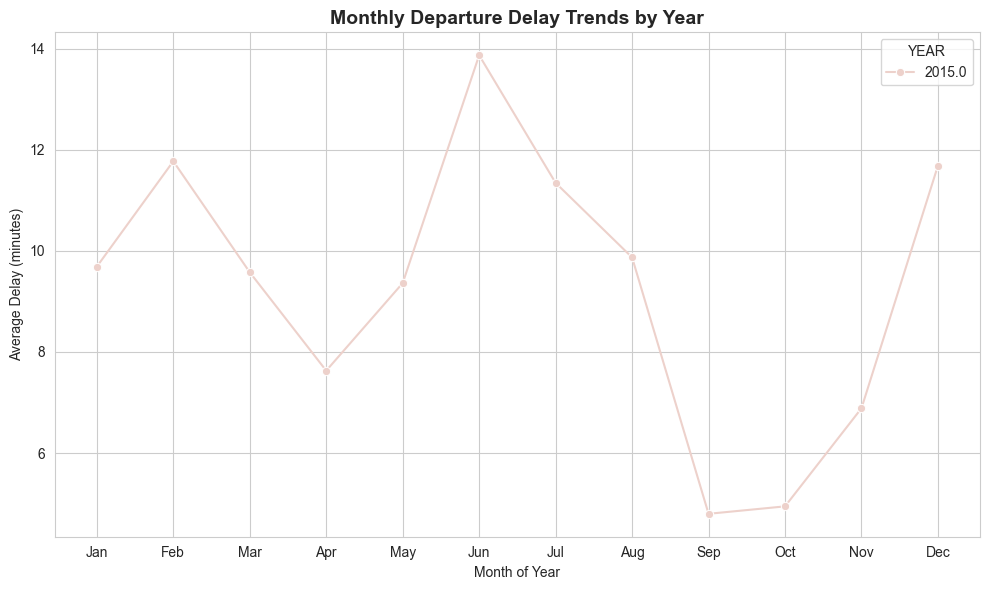

In [10]:
# Plot aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Compute monthly average delay per year
monthly_yearly = (
    df.groupby(['YEAR', 'MONTH'])['DEPARTURE_DELAY']
    .mean()
    .reset_index()
)

# Line plot
sns.lineplot(
    data=monthly_yearly,
    x='MONTH', y='DEPARTURE_DELAY',
    hue='YEAR', marker='o'
)

plt.title("Monthly Departure Delay Trends by Year", fontsize=14, fontweight='bold')
plt.xlabel("Month of Year")
plt.ylabel("Average Delay (minutes)")
plt.xticks(range(1, 13), 
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.tight_layout()
plt.show()


### The plot shows that average departure delays peak in June (~14 min), then decrease during the mid-year months, with secondary peaks in February and December (~11–12 min). This pattern may reflect seasonal travel surges and holiday periods

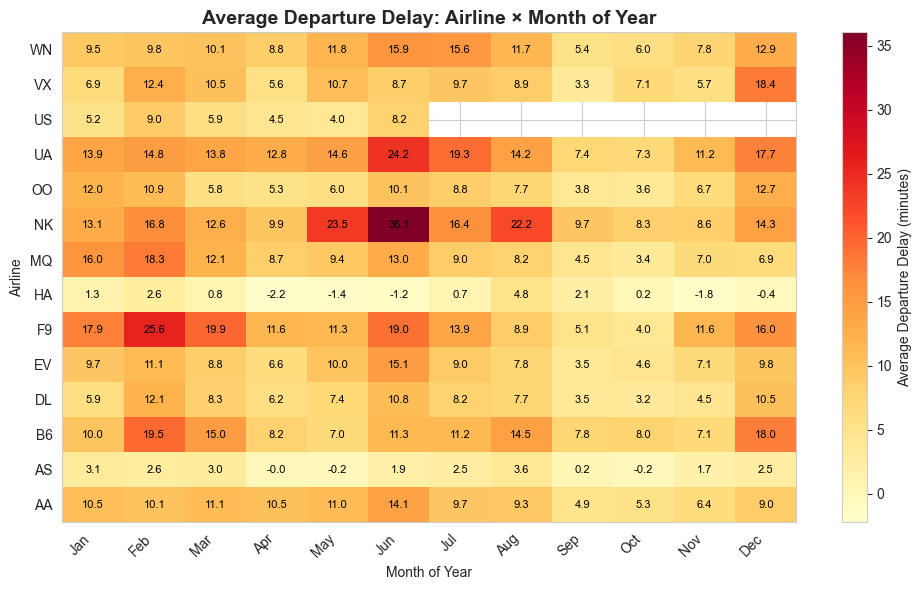

In [11]:
# --- Pivot table: airlines vs months ---
pivot = df.pivot_table(
    values='DEPARTURE_DELAY',
    index='AIRLINE',
    columns='MONTH',
    aggfunc='mean'
)
values = pivot.values

# --- Create heatmap ---
fig, ax = plt.subplots(figsize=(10, 6))

# Mesh for pcolormesh (edge alignment)
X, Y = np.meshgrid(np.arange(values.shape[1]+1), np.arange(values.shape[0]+1))
c = ax.pcolormesh(X, Y, values, cmap='YlOrRd', shading='auto')

# --- Colorbar ---
cbar = fig.colorbar(c, ax=ax)
cbar.set_label('Average Departure Delay (minutes)')

# --- Ticks at cell centers ---
ax.set_xticks(np.arange(values.shape[1]) + 0.5)
ax.set_xticklabels(
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    rotation=45, ha='right'
)
ax.set_yticks(np.arange(values.shape[0]) + 0.5)
ax.set_yticklabels(pivot.index)

# --- Annotate values ---
for i in range(values.shape[0]):
    for j in range(values.shape[1]):
        if not np.isnan(values[i, j]):
            ax.text(j + 0.5, i + 0.5, f"{values[i, j]:.1f}",
                    ha='center', va='center', color='black', fontsize=8)

# --- Labels and title ---
ax.set_xlabel("Month of Year")
ax.set_ylabel("Airline")
ax.set_title("Average Departure Delay: Airline × Month of Year", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


### This plot combines airline-level and monthly average delays, showing similar patterns as discussed earlier. Average delays rise in mid-year and at the start/end of the year. Notably, there are no flights from US airlines between July and December, which may reflect missing data or seasonal scheduling gaps.

### Statistical Test: Airline-Level Differences

In [12]:
from scipy.stats import f_oneway

groups = [
    df[df["AIRLINE"] == airline]["DEPARTURE_DELAY"].dropna()
    for airline in df["AIRLINE"].unique()
]

f_stat, p_value = f_oneway(*groups)
f_stat, p_value


(np.float32(2588.831), np.float32(0.0))


A one-way ANOVA was conducted to test whether mean departure delays differ across airlines.
The test returned a very large F-statistic (F ≈ 2589) with a p-value effectively equal to zero
(p < 0.001), indicating statistically significant differences in mean delays across airlines.

Given the large sample size, this result confirms the visual patterns observed in the exploratory
analysis. However, this test is observational and does not imply causality, as other factors
such as airport congestion, route structure, and weather are not controlled for.
